# Importing required libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr
import pickle

# importing dataset

In [2]:
x = pd.read_csv(r'C:\Users\Dell\Desktop\Project Prediction\train_heart.csv')
y = pd.read_csv(r'C:\Users\Dell\Desktop\Project Prediction\test_heart.csv')

In [3]:
x.columns

y.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
y.info()

y.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory Data Analysis

<Axes: >

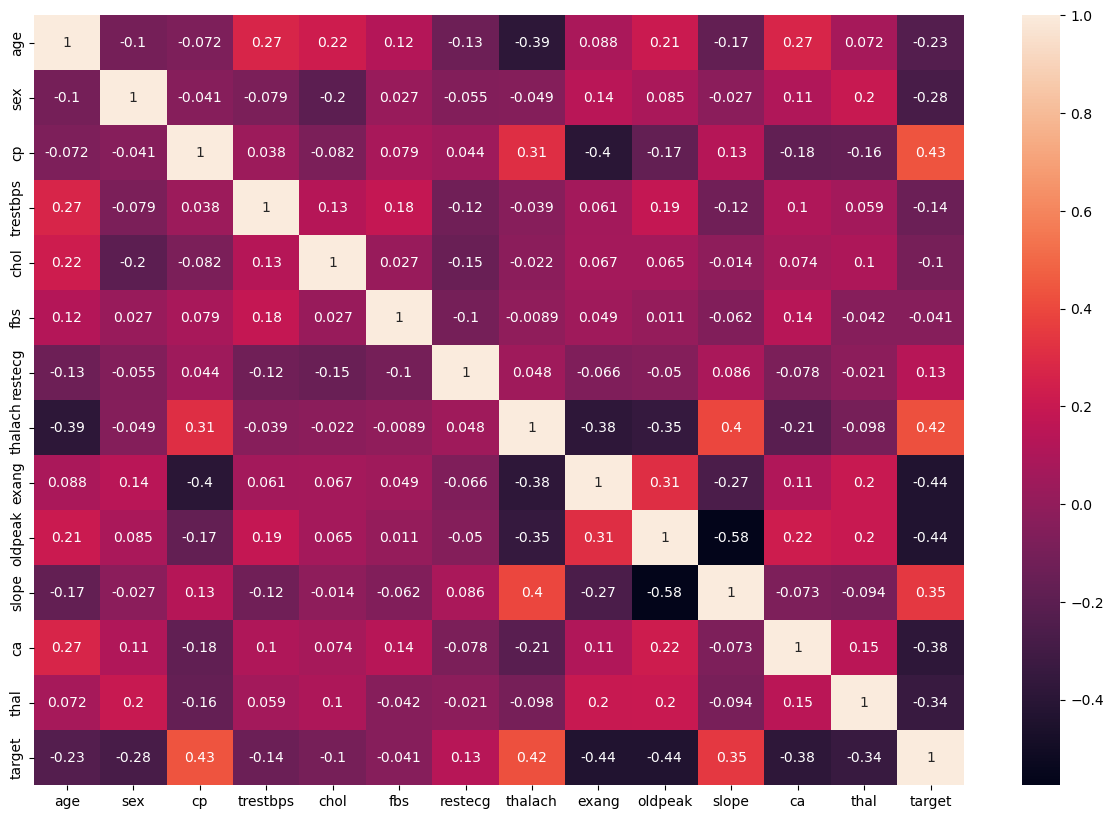

In [5]:
plt.subplots(figsize=(15, 10))
sns.heatmap(x.corr(), annot = True)

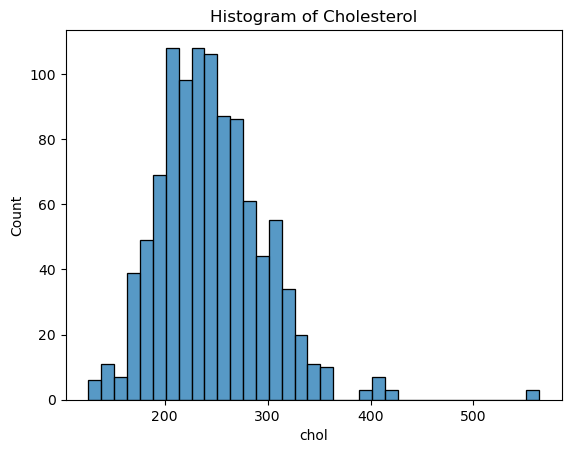

In [20]:
# Histogram of chol

sns.histplot(data=x, x='chol')
plt.title('Histogram of Cholesterol')
plt.show()

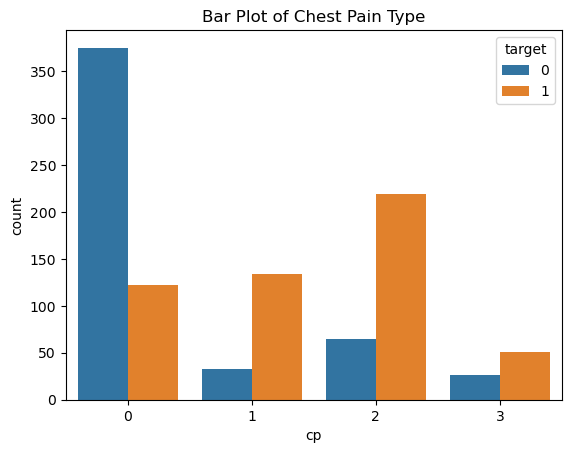

In [22]:
# Bar plot of cp type

sns.countplot(data=x, x='cp', hue='target')
plt.title('Bar Plot of Chest Pain Type')
plt.show()

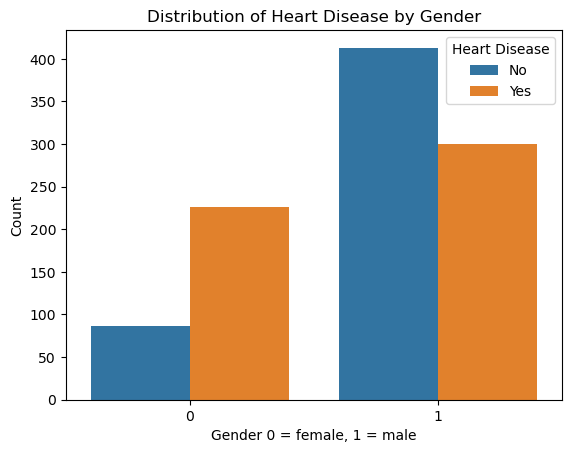

In [6]:
#count of males and females having heart disease

sns.countplot(data=x, x='sex', hue='target')
plt.title('Distribution of Heart Disease by Gender')
plt.xlabel('Gender 0 = female, 1 = male')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


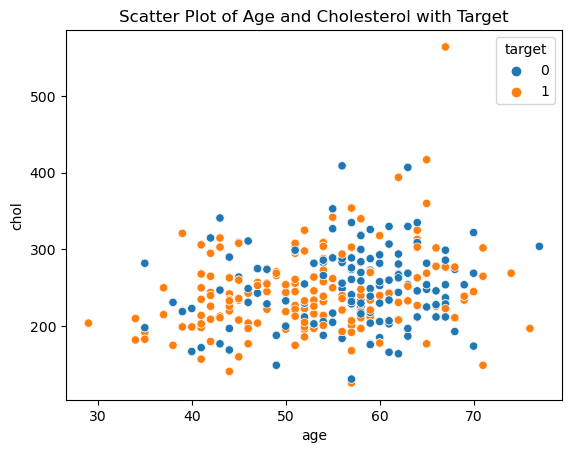

In [7]:
sns.scatterplot(data=x, x='age', y='chol', hue='target')
plt.title('Scatter Plot of Age and Cholesterol with Target')
plt.show()

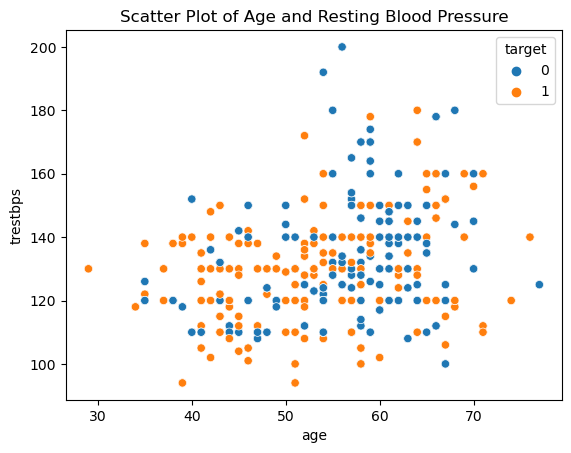

In [8]:
sns.scatterplot(data=x, x='age', y='trestbps', hue='target')
plt.title('Scatter Plot of Age and Resting Blood Pressure')
plt.show()

# Importing Models from sklearn library

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

In [10]:
#removing target column from data

a_train = x.drop(['target'], axis=1)
b_train = x['target']

a_test = y.drop(['target'], axis=1)
b_test = y['target']

# Training Models

In [23]:
model_lr = LogisticRegression(max_iter = 1500)
model_lr.fit(a_train, b_train)

LogisticRegression(max_iter=1500)

In [24]:
model_rf = RandomForestClassifier()
model_rf.fit(a_train, b_train)

RandomForestClassifier()

In [25]:
b_pred = model_lr.predict(a_test)

In [26]:
Brf_pred = model_rf.predict(a_test)

# Comparing both models on the basis of accuracy

In [15]:
print("LOGISTIC REGRESSSION")
print(classification_report(y_pred=b_pred, y_true=b_test))
print("RANDOM FOREST CLASSIFIER")
print(classification_report(y_pred=Brf_pred, y_true=b_test))

LOGISTIC REGRESSSION
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       138
           1       0.84      0.92      0.88       165

    accuracy                           0.86       303
   macro avg       0.87      0.86      0.86       303
weighted avg       0.86      0.86      0.86       303

RANDOM FOREST CLASSIFIER
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       165

    accuracy                           1.00       303
   macro avg       1.00      1.00      1.00       303
weighted avg       1.00      1.00      1.00       303



In [16]:
print(accuracy_score(y_pred=b_pred, y_true=b_test))

print(accuracy_score(y_pred= Brf_pred, y_true=b_test))

0.8613861386138614
1.0


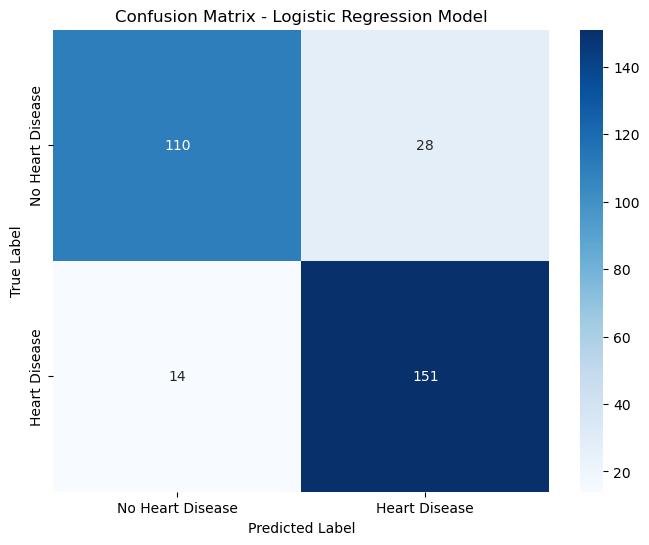

In [29]:
#confusion matrix for Logistic Regression

conf_matrix_lr = confusion_matrix(b_test, b_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix - Logistic Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

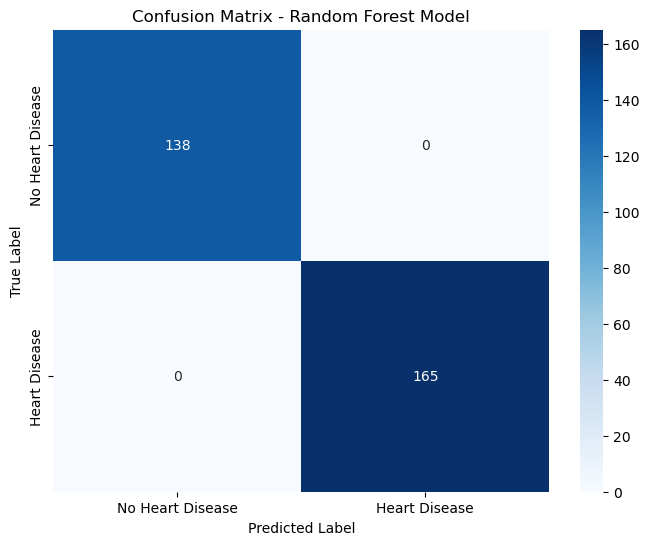

In [27]:
#confusion matrix for random forest

conf_matrix_rf = confusion_matrix(b_test, Brf_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix - Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

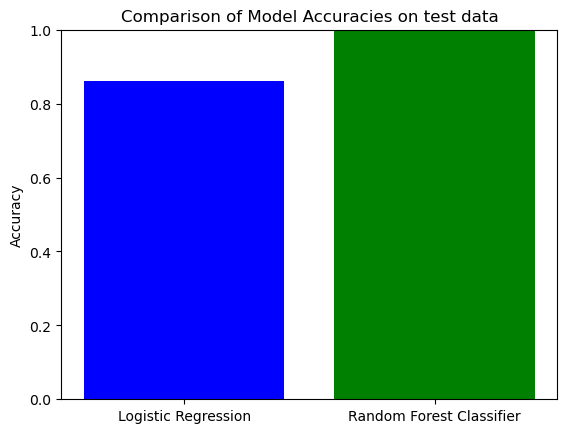

In [17]:
# Predictions from Logistic Regression model
b_pred_lr = model_lr.predict(a_test)
accuracy_lr = accuracy_score(b_test, b_pred_lr)


# Predictions from Random Forest Classifier model
b_pred_rf = model_rf.predict(a_test)
accuracy_rf = accuracy_score(b_test, b_pred_rf)

# Bar graph
labels = ['Logistic Regression', 'Random Forest Classifier']
accuracies = [accuracy_lr, accuracy_rf]

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies on test data')
plt.ylim(0, 1) 
plt.show()

# saving random forest model as pkl file

In [18]:
with open('heart_disease.pkl', 'wb') as file:
    pickle.dump(model_rf, file)

# Checking model with random user input

In [18]:
age = int(input("enter age: "))
sex = int(input("enter sex(0 female 1 male): "))
cp = int(input("enter cp (0-3):"))
trestbps = int(input("enter trestbps: "))
chol = int(input("enter chol: "))
fbs = int(input("enter fbs: "))
restecg = int(input("enter restecg: "))
thalach = int(input("enter thalach: "))
exang = int(input("enter exang: "))
oldpeak = float(input("enter oldpeak: "))
slope = int(input("enter slope: "))
ca = int(input("enter ca(0-3): "))
thal = int(input("enter thal: "))

user_input = {
        'age': [age],
        'sex': [sex],
        'cp': [cp],
        'trestbps': [trestbps],
        'chol': [chol],
        'fbs': [fbs],
        'restecg': [restecg],
        'thalach': [thalach],
        'exang': [exang],
        'oldpeak': [oldpeak],
        'slope': [slope],
        'ca': [ca],
        'thal': [thal]
    }
user_DF = pd.DataFrame(user_input)

enter age: 1
enter sex(0 female 1 male): 1
enter cp (0-3):1
enter trestbps: 1
enter chol: 1
enter fbs: 1
enter restecg: 1
enter thalach: 1
enter exang: 1
enter oldpeak: 1
enter slope: 1
enter ca(0-3): 1
enter thal: 1


# predictions

In [19]:
def heart_prediction(user_DF):
    pred_user = model_rf.predict(user_DF)
    if pred_user == 0:
        return "No heart disease\nYou're healthy"
    elif pred_user == 1:
        return "Heart disease\nTake precautions"
    
result = heart_prediction(user_DF)
print(result)


No heart disease
You're healthy
